In [39]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# CSV 파일들이 저장된 디렉토리 경로를 지정합니다.
folder_path = './'

# 폴더 내 모든 CSV 파일을 리스트로 저장합니다.
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 각 CSV 파일을 읽어들여 리스트에 저장합니다.
dfs = []
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    # Previous Setpoint 열 생성
    df['Previous Setpoint'] = df['Setpoint'].shift(1)

    # 첫 번째 행의 Previous Setpoint는 없으므로 NaN 값을 제거
    df = df.dropna(subset=['Previous Setpoint'])
    dfs.append(df)

# 모든 데이터프레임을 하나로 결합합니다.
combined_df = pd.concat(dfs, ignore_index=True)

# Previous Setpoint와 Setpoint를 고유 값의 순서에 맞게 범주형 변수로 변환
combined_df['Previous Setpoint'] = pd.Categorical(combined_df['Previous Setpoint'], categories=sorted(combined_df['Previous Setpoint'].unique()), ordered=True)
combined_df['Setpoint'] = pd.Categorical(combined_df['Setpoint'], categories=sorted(combined_df['Setpoint'].unique()), ordered=True)

combined_df

,Name,Setpoint,Achieved Temperature,Time Interval (s),Time to Reach (s),Feedback,Previous Setpoint
0,eunchae,32.0,33.72,19,19.01,Neutral,40.0
1,eunchae,40.0,40.08,19,19.23,Hot,32.0
2,eunchae,24.0,29.81,19,19.52,Cool,40.0
3,eunchae,40.0,36.17,19,19.08,Hot,24.0
4,eunchae,36.0,35.68,19,19.21,Warm,40.0
5,eunchae,40.0,39.59,19,19.42,Hot,36.0
6,eunchae,28.0,29.81,19,19.02,Cool,40.0
7,eunchae,24.0,NaN,19,19.29,Cold,28.0
8,eunchae,32.0,NaN,19,19.22,Neutral,24.0
9,eunchae,24.0,NaN,19,19.00,Cool,32.0


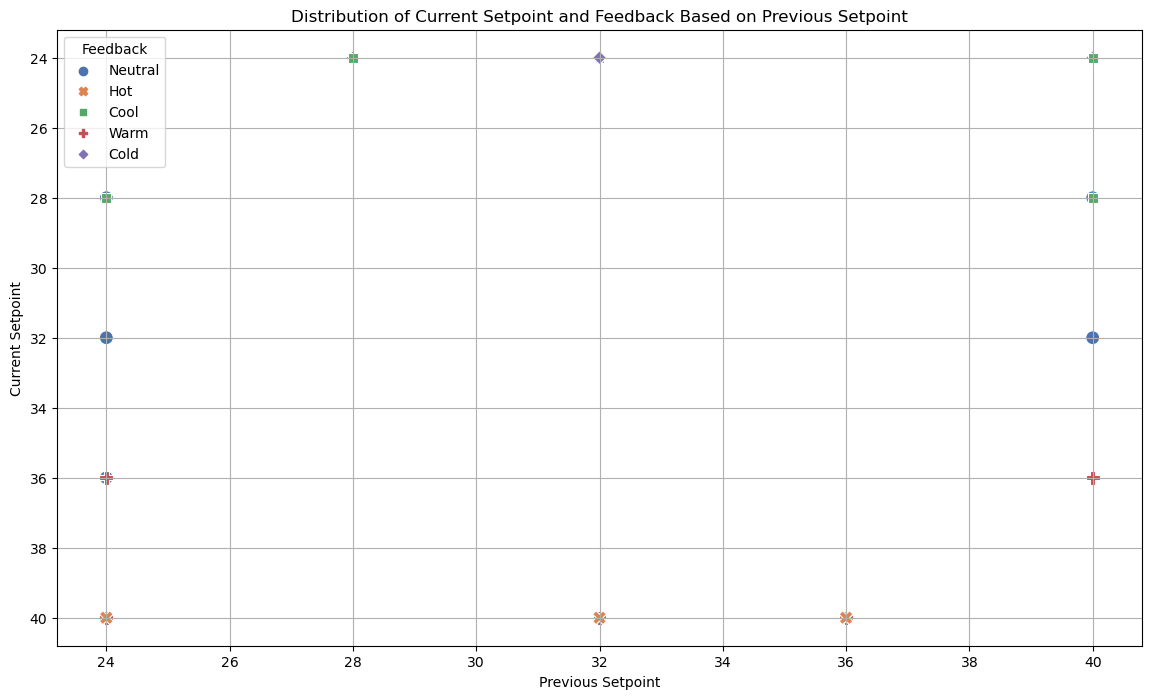

In [50]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot to visualize the distribution of current Setpoint and Feedback based on Previous Setpoint
plt.figure(figsize=(14, 8))

# Scatter plot for Setpoint vs Previous Setpoint, colored by Feedback
sns.scatterplot(
    data=combined_df,
    x='Previous Setpoint',
    y='Setpoint',
    hue='Feedback',
    style='Feedback',
    palette='deep',
    s=100
)

plt.title('Distribution of Current Setpoint and Feedback Based on Previous Setpoint')
plt.xlabel('Previous Setpoint')
plt.ylabel('Current Setpoint')
plt.legend(title='Feedback')
plt.grid(True)

plt.show()

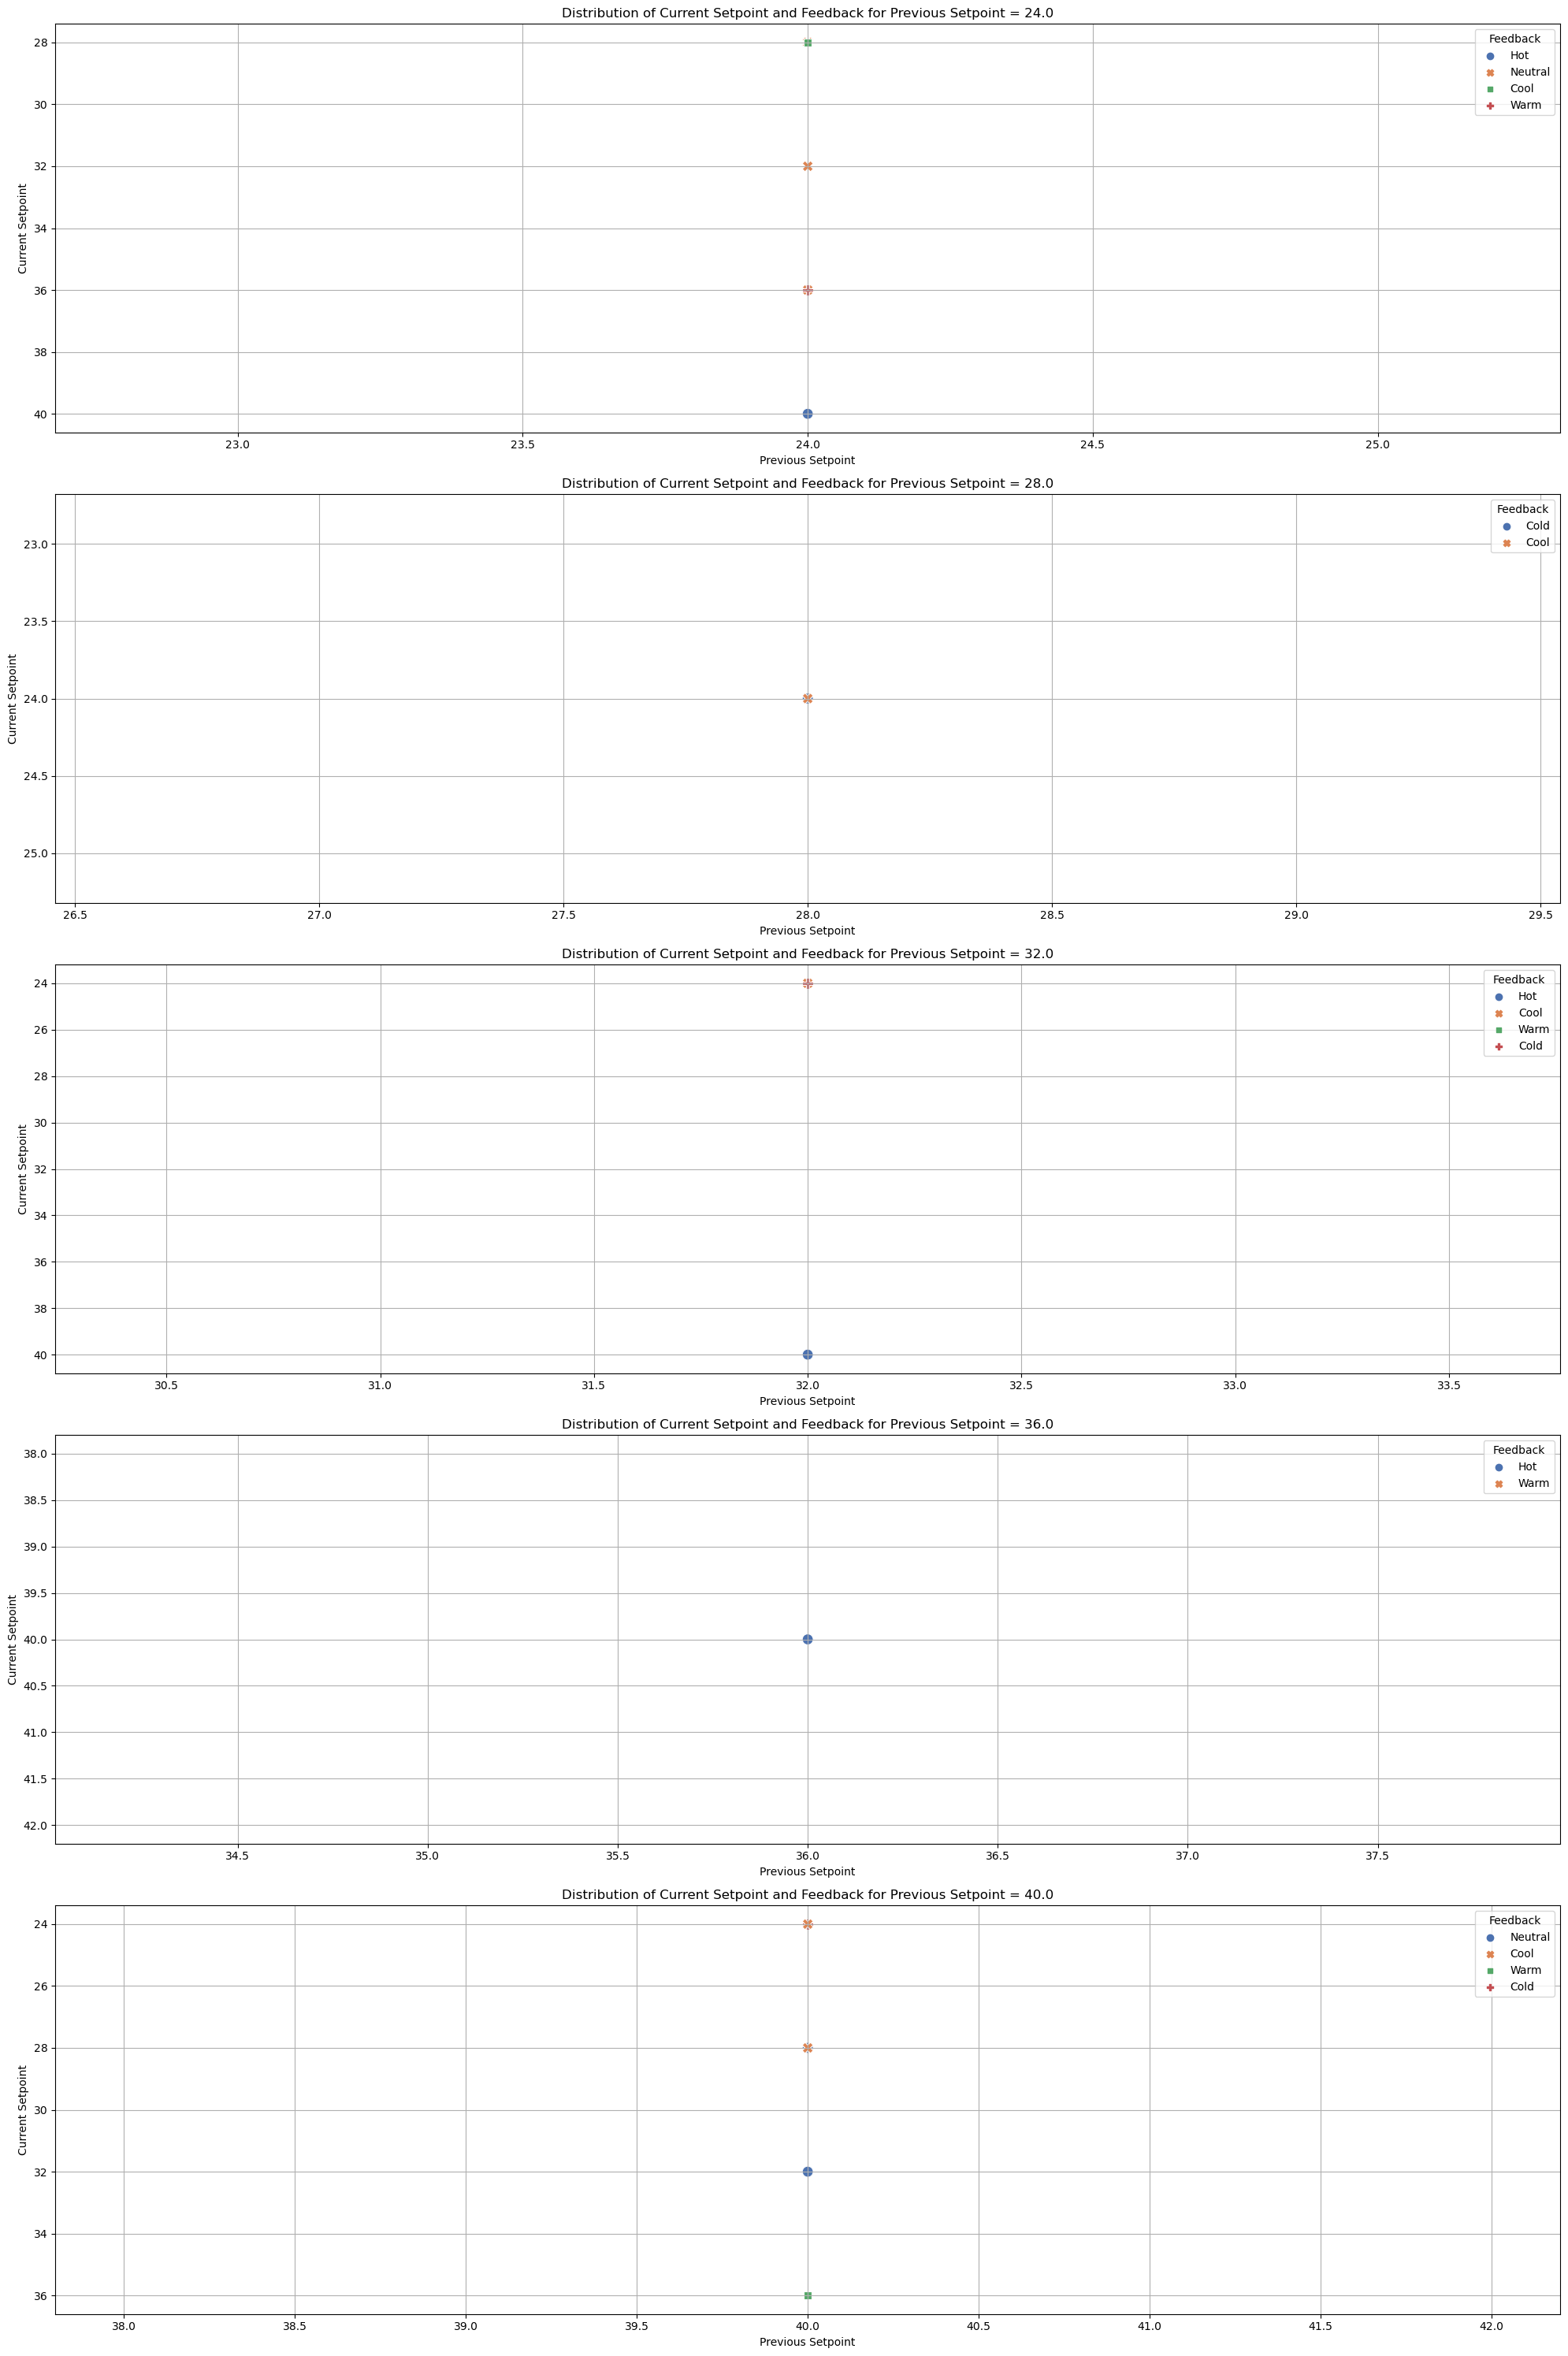

In [51]:

unique_previous_setpoints = combined_df['Previous Setpoint'].cat.categories

# Create a series of scatter plots, one for each unique Previous Setpoint
plt.figure(figsize=(20, 30))

for i, prev_setpoint in enumerate(unique_previous_setpoints, 1):
    plt.subplot(len(unique_previous_setpoints), 1, i)
    subset = combined_df[combined_df['Previous Setpoint'] == prev_setpoint]
    sns.scatterplot(
        data=subset,
        x='Previous Setpoint',
        y='Setpoint',
        hue='Feedback',
        style='Feedback',
        palette='deep',
        s=100
    )
    plt.title(f'Distribution of Current Setpoint and Feedback for Previous Setpoint = {prev_setpoint}')
    plt.xlabel('Previous Setpoint')
    plt.ylabel('Current Setpoint')
    plt.legend(title='Feedback')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [5]:
import os
import pandas as pd

# Define the directory where the CSV files are stored
directory_path = './thermal_data'

# Initialize an empty list to hold each DataFrame
dataframes = []

# List all CSV files in the directory
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# Function to add "Previous Setpoint" column to the dataframe
def add_previous_setpoint_column(df):
    df['Previous Setpoint'] = df['Setpoint'].shift(1)
    df = df.dropna(subset=['Previous Setpoint'])
    return df

# Iterate through each CSV file, apply the changes, and save the updated file
for file_name in csv_files:
    file_path = os.path.join(directory_path, file_name)
    
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Apply the function to add the "Previous Setpoint" column
    df = add_previous_setpoint_column(df)

    dataframes.append(df)
    
# Concatenate all the DataFrames in the list into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)



In [6]:
combined_df

,Name,Setpoint,Achieved Temperature,Time Interval (s),Time to Reach (s),Feedback,Previous Setpoint
0,eunchae,32.0,33.72,19,19.01,Neutral,40.0
1,eunchae,40.0,40.08,19,19.23,Hot,32.0
2,eunchae,24.0,29.81,19,19.52,Cool,40.0
3,eunchae,40.0,36.17,19,19.08,Hot,24.0
4,eunchae,36.0,35.68,19,19.21,Warm,40.0
5,eunchae,40.0,39.59,19,19.42,Hot,36.0
6,eunchae,28.0,29.81,19,19.02,Cool,40.0
7,eunchae,24.0,NaN,19,19.29,Cold,28.0
8,eunchae,32.0,NaN,19,19.22,Neutral,24.0
9,eunchae,24.0,NaN,19,19.00,Cool,32.0


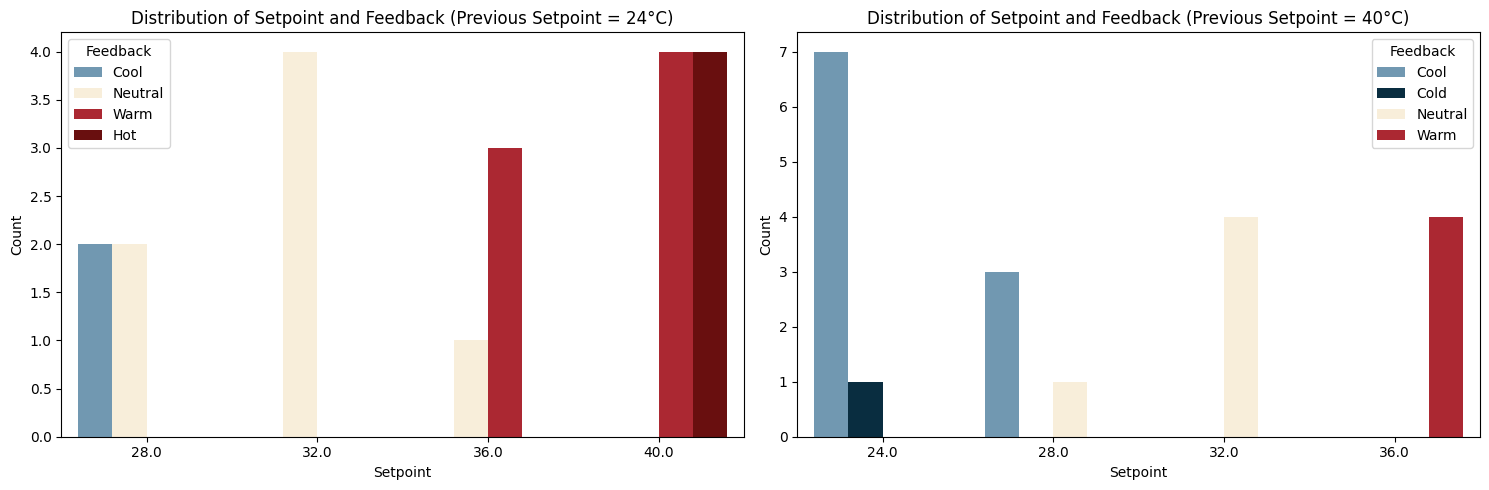

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of Previous Setpoint values to analyze
previous_setpoints = [24, 40]

# Set up the plotting area
plt.figure(figsize=(15, 5))

# Define a custom color palette for Feedback categories
custom_palette = {
    'Hot': '#780000',  # Red shade for Hot
    'Warm': '#c1121f',  # Lighter red (salmon) for Warm
    'Neutral': '#fdf0d5', 
    'Cool': '#669bbc',  # Light blue for Cool
    'Cold': '#003049'   # Darker blue for Cold
}

# Iterate over each Previous Setpoint value
for i, setpoint in enumerate(previous_setpoints, 1):
    plt.subplot(1, len(previous_setpoints), i)
    
    # Filter the DataFrame for the current Previous Setpoint
    filtered_df = combined_df[combined_df['Previous Setpoint'] == setpoint]
    
    # Plot the relationship between Setpoint and Feedback
    sns.countplot(data=filtered_df, x='Setpoint', hue='Feedback', palette=custom_palette)
    
    plt.title(f'Distribution of Setpoint and Feedback (Previous Setpoint = {setpoint}°C)')
    plt.xlabel('Setpoint')
    plt.ylabel('Count')
    plt.legend(title='Feedback')

plt.tight_layout()
plt.show()

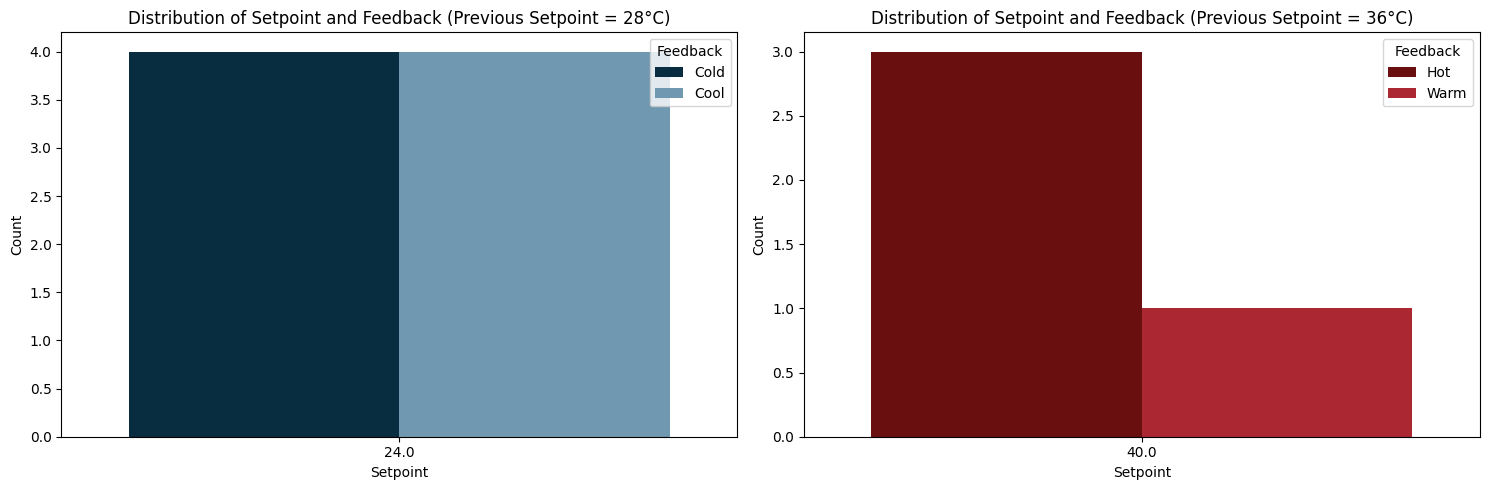

In [13]:
# List of Previous Setpoint values to analyze
previous_setpoints = [28, 36]

# Set up the plotting area
plt.figure(figsize=(15, 5))

# Define a custom color palette for Feedback categories
custom_palette = {
    'Hot': '#780000',  # Red shade for Hot
    'Warm': '#c1121f',  # Lighter red (salmon) for Warm
    'Neutral': '#fdf0d5', 
    'Cool': '#669bbc',  # Light blue for Cool
    'Cold': '#003049'   # Darker blue for Cold
}

# Iterate over each Previous Setpoint value
for i, setpoint in enumerate(previous_setpoints, 1):
    plt.subplot(1, len(previous_setpoints), i)
    
    # Filter the DataFrame for the current Previous Setpoint
    filtered_df = combined_df[combined_df['Previous Setpoint'] == setpoint]
    
    # Plot the relationship between Setpoint and Feedback
    sns.countplot(data=filtered_df, x='Setpoint', hue='Feedback', palette=custom_palette)
    
    plt.title(f'Distribution of Setpoint and Feedback (Previous Setpoint = {setpoint}°C)')
    plt.xlabel('Setpoint')
    plt.ylabel('Count')
    plt.legend(title='Feedback')

plt.tight_layout()
plt.show()

In [89]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(combined_df['Previous Setpoint'], combined_df['Feedback'])

print(contingency_table)
print('\n\n')

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

# p-value를 기반으로 유의미한 차이 파악
alpha = 0.05  # 일반적으로 사용하는 유의 수준
if p < alpha:
    print("p-value가 유의 수준보다 작으므로, 'Previous Setpoint'와 'Feedback' 간의 관계가 통계적으로 유의미합니다.")
else:
    print("p-value가 유의 수준보다 크므로, 'Previous Setpoint'와 'Feedback' 간의 관계가 통계적으로 유의미하지 않습니다.")

Feedback           Cold  Cool  Hot  Neutral  Warm
Previous Setpoint                                
24.0                  0     2    4        7     7
28.0                  4     4    0        0     0
32.0                  2     2    3        0     1
36.0                  0     0    3        0     1
40.0                  1    10    0        1     4



Chi-Square Statistic: 49.78886752136752
p-value: 2.4769447442344714e-05
Degrees of Freedom: 16
Expected Frequencies Table:
[[2.5        6.42857143 3.57142857 2.85714286 4.64285714]
 [1.         2.57142857 1.42857143 1.14285714 1.85714286]
 [1.         2.57142857 1.42857143 1.14285714 1.85714286]
 [0.5        1.28571429 0.71428571 0.57142857 0.92857143]
 [2.         5.14285714 2.85714286 2.28571429 3.71428571]]
p-value가 유의 수준보다 작으므로, 'Previous Setpoint'와 'Feedback' 간의 관계가 통계적으로 유의미합니다.
